<div style="background-color:#ffecd2; color:#0f0c29; text-align:center; padding:15px; font-size:15px; border-radius:25px;">Fuel Consumption</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/kaggle/input/ship-fuel-consumption-and-co2-emissions-analysis/ship_fuel_efficiency.csv")
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [2]:
df.shape

(1440, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [4]:
df.isnull().sum()

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
numeric_columns = df.select_dtypes(include="float").columns
categoric_columns = ['ship_type', 'route_id', 'month', 'fuel_type',
        'weather_conditions']
numeric_columns ,categoric_columns

(Index(['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency'], dtype='object'),
 ['ship_type', 'route_id', 'month', 'fuel_type', 'weather_conditions'])

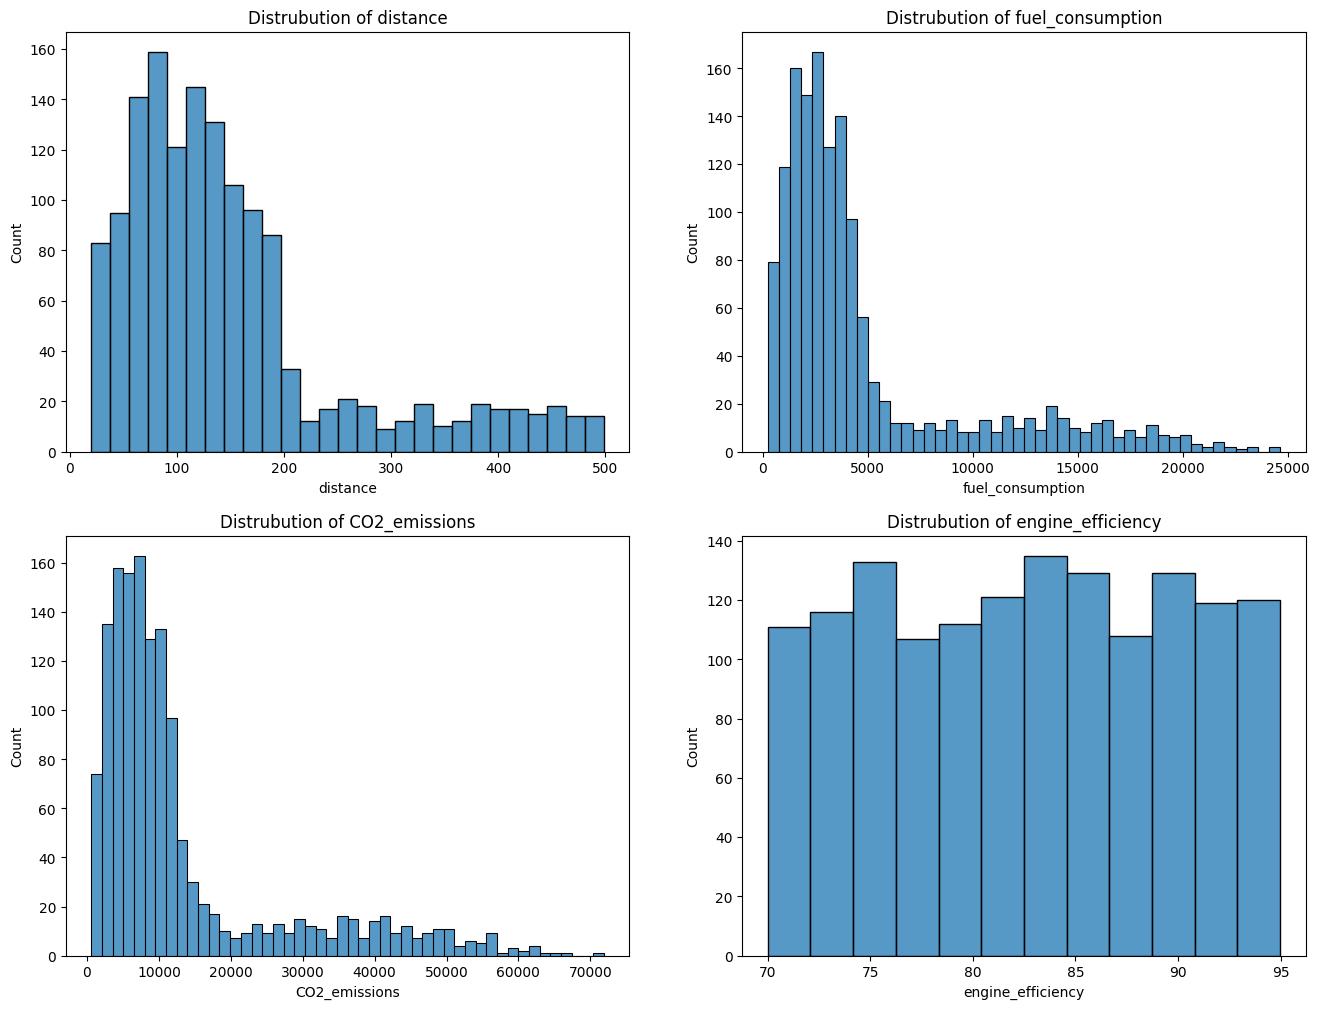

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(16,12))
for i,col in enumerate(numeric_columns):
    i +=1
    plt.subplot(2,2,i)
    plt.title(f"Distrubution of {col}")
    plt.xlabel(col)
    plt.ylabel(f"")
    sns.histplot(x=df[col])
plt.show()
plt.tight_layout()

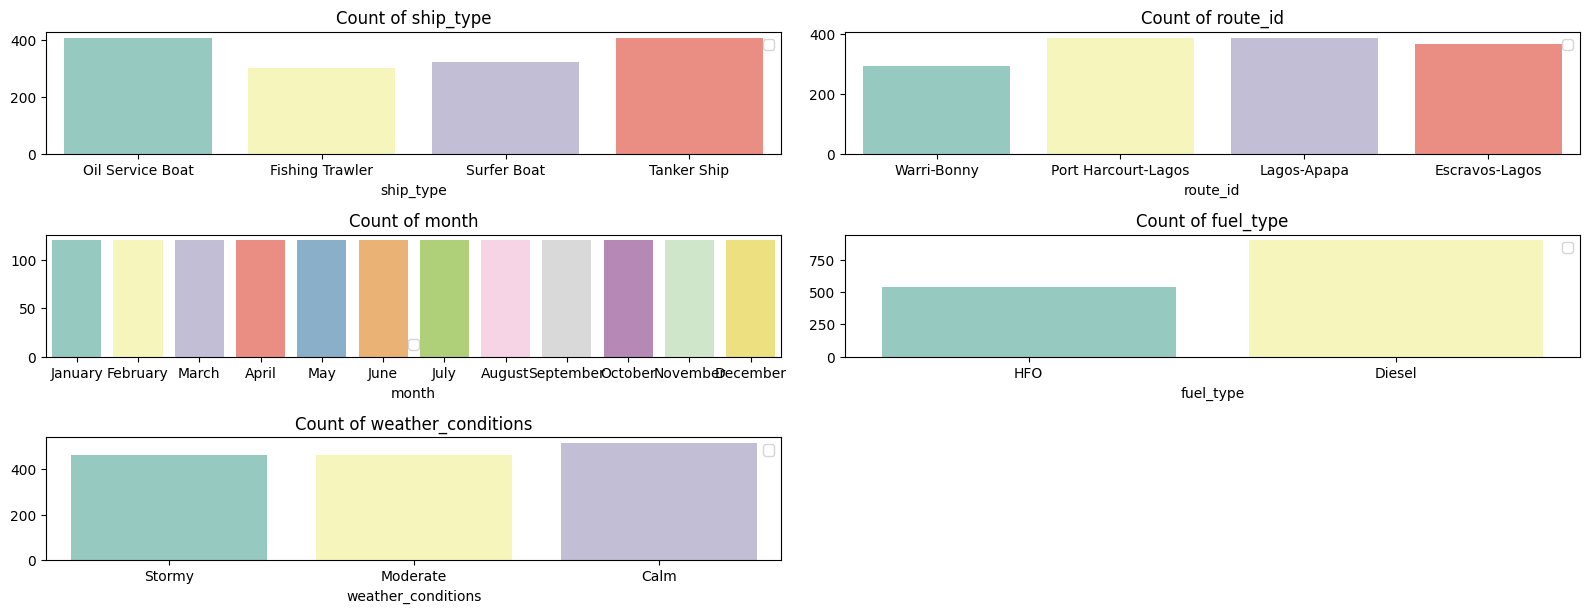

In [8]:
plt.figure(figsize=(16,20))
for i,col in enumerate(categoric_columns):
    i +=1
    plt.subplot(10,2,i)
    sns.countplot(x=df[col],palette ="Set3")
    plt.legend()
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel(f"")
plt.tight_layout()    
plt.show()
    